In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_filepath='../titanic/data/train.csv'
test_filepath='../titanic/data/test.csv'
titanic_data=pd.read_csv(train_filepath)
test_data=pd.read_csv(test_filepath)
df=titanic_data.copy()

### Analyse de la forme

In [5]:
df .head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.shape

(891, 12)

Le dataset est composé de 891 lignes et 12 colonnes


Voici la répartition des types de données:
int64      5
object     5
float64    2
dtype: int64
AxesSubplot(0.260833,0.125;0.503333x0.755)


Sur les 12 colonnes du dataset, 3 présentent au moins 1 valeur manquante, soit 25.0 % des colonnes 


Voici les colonnes qui contiennent des valeurs manquantes:

          Nbre de valeurs manquantes  Pourcentage de valeurs manquantes
Cabin                            687                              77.10
Age                              177                              19.87
Embarked                           2                               0.22


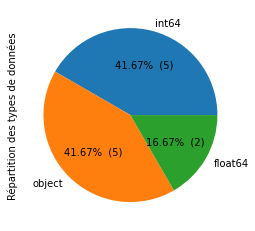

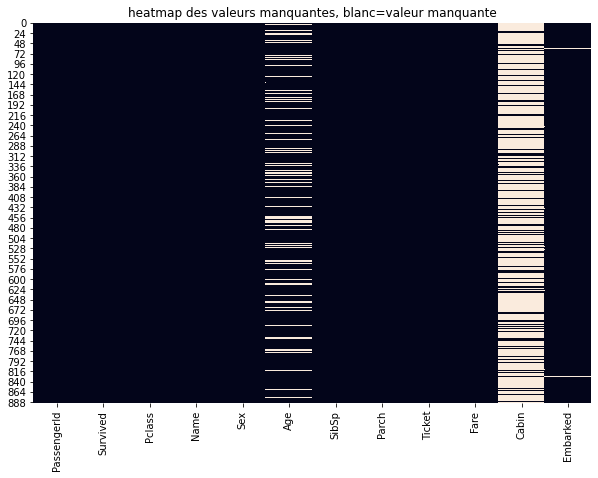

In [8]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

def countplot_with_percent(x,hue):
    df1 = df.groupby(x)[hue].value_counts(normalize=True)
    df1 = df1.mul(100)
    df1 = df1.rename('percent').reset_index()

    g = sns.catplot(x=x,y='percent',hue=hue,kind='bar',data=df1)
    g.ax.set_ylim(0,100)

    for p in g.ax.patches:
        txt = str(p.get_height().round(2)) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height()
        g.ax.text(txt_x,txt_y,txt)
        
def analyse_de_la_forme(df):
    
    #Shape du dataset
    print('Le dataset est composé de',df.shape[0],'lignes et',df.shape[1],'colonnes\n\n')
    
    #Répartition des données
    print(f'Voici la répartition des types de données:\n{df.dtypes.value_counts()}')
    print(df.dtypes.value_counts().plot.pie(label='Répartition des types de données',autopct=make_autopct(df.dtypes.value_counts())))
    
    #Répartition des valeurs manquantes
    miss_col=(df.isna().sum(axis=0)[df.isna().sum(axis=0)>=1])
    n_miss_val=miss_col.sort_values(ascending=False)
    percent_miss_val=((miss_col)/df.shape[0]).sort_values(ascending=False).mul(100).round(2)
    
    
    miss_val=pd.DataFrame({'Nbre de valeurs manquantes':n_miss_val ,
                       'Pourcentage de valeurs manquantes': percent_miss_val
                      })
    
    print(f'\n\nSur les {df.shape[1]} colonnes du dataset, {len(miss_col)} présentent au moins 1 valeur manquante, soit {round(((len(miss_col))/df.shape[1])*100,2)} % des colonnes ')
    print(f'\n\nVoici les colonnes qui contiennent des valeurs manquantes:\n\n{miss_val}')
    
    #heatmap des valeurs manquantes
    plt.figure(figsize=(10,7))
    plt.title('heatmap des valeurs manquantes, blanc=valeur manquante')
    sns.heatmap(data=df.isna(),cbar=False)
analyse_de_la_forme(df)